In [39]:
#importing all the important libraries required for developing the model.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from sklearn.metrics import confusion_matrix,classification_report

In [40]:
#reading the dataset with the help of pandas library.
tr = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fraudTrain.csv')
tt = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fraudTest.csv')

In [41]:
#displaying first five rows of the dataframe using the head command
tr.head(5)#training dataset

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [42]:
#displaying first five rows of the dataframe using the head command
tt.head(5)#testing dataset

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


<Axes: xlabel='is_fraud', ylabel='count'>

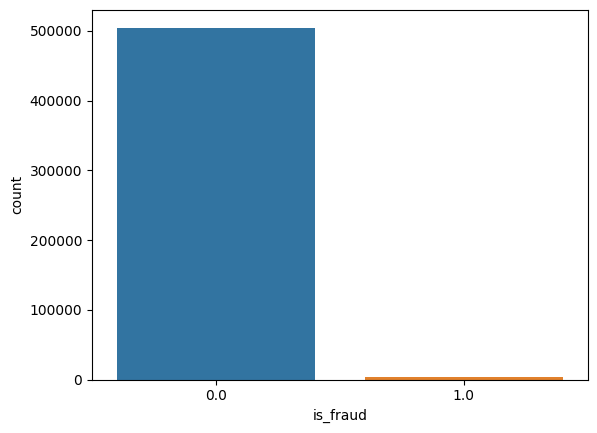

In [43]:
#countplot of the isfraud represented by 1 and represented by 0 for not fraud.
sns.countplot(x = 'is_fraud', data = tr)#training dataset

<Axes: xlabel='is_fraud', ylabel='count'>

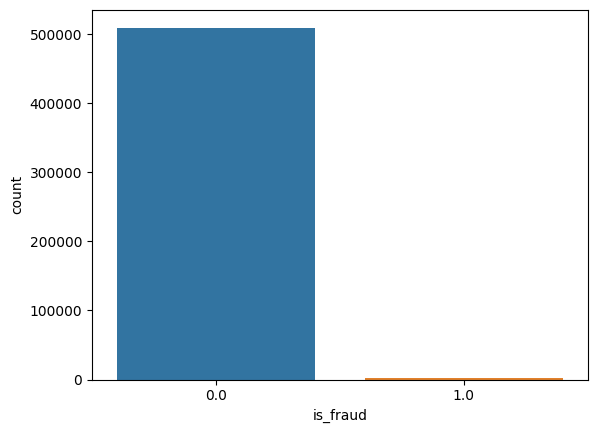

In [44]:
#countplot of the isfraud represented by 1 and represented by 0 for not fraud.
sns.countplot(x = 'is_fraud', data = tt)#testing dataset

In [45]:
#dropping the unwanted labels
tr = tr.drop(labels={'trans_date_trans_time','category', 'street'}, axis = 1)

In [46]:
#info of the training dataset
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507765 entries, 0 to 507764
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  507765 non-null  int64  
 1   cc_num      507765 non-null  int64  
 2   merchant    507765 non-null  object 
 3   amt         507765 non-null  float64
 4   first       507765 non-null  object 
 5   last        507765 non-null  object 
 6   gender      507765 non-null  object 
 7   city        507765 non-null  object 
 8   state       507765 non-null  object 
 9   zip         507765 non-null  int64  
 10  lat         507765 non-null  float64
 11  long        507765 non-null  float64
 12  city_pop    507765 non-null  int64  
 13  job         507765 non-null  object 
 14  dob         507764 non-null  object 
 15  trans_num   507764 non-null  object 
 16  unix_time   507764 non-null  float64
 17  merch_lat   507764 non-null  float64
 18  merch_long  507764 non-null  float64
 19  is

In [47]:
#filling the empty cells with fillna method in training dataset.
tr['dob']= tr['dob'].fillna(method = 'ffill')
tr['trans_num']= tr['trans_num'].fillna(method = 'ffill')
tr['unix_time']= tr['unix_time'].fillna(method = 'ffill')
tr['merch_lat']= tr['merch_lat'].fillna(method = 'ffill')
tr['merch_long']= tr['merch_long'].fillna(method = 'ffill')
tr['is_fraud']= tr['is_fraud'].fillna(method = 'ffill')

In [48]:
#info of the training data after removing the unwanted labels and filling the empty cells.
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507765 entries, 0 to 507764
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  507765 non-null  int64  
 1   cc_num      507765 non-null  int64  
 2   merchant    507765 non-null  object 
 3   amt         507765 non-null  float64
 4   first       507765 non-null  object 
 5   last        507765 non-null  object 
 6   gender      507765 non-null  object 
 7   city        507765 non-null  object 
 8   state       507765 non-null  object 
 9   zip         507765 non-null  int64  
 10  lat         507765 non-null  float64
 11  long        507765 non-null  float64
 12  city_pop    507765 non-null  int64  
 13  job         507765 non-null  object 
 14  dob         507765 non-null  object 
 15  trans_num   507765 non-null  object 
 16  unix_time   507765 non-null  float64
 17  merch_lat   507765 non-null  float64
 18  merch_long  507765 non-null  float64
 19  is

In [49]:
#info of the testing data
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511623 entries, 0 to 511622
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             511623 non-null  int64  
 1   trans_date_trans_time  511623 non-null  object 
 2   cc_num                 511623 non-null  int64  
 3   merchant               511623 non-null  object 
 4   category               511623 non-null  object 
 5   amt                    511623 non-null  float64
 6   first                  511623 non-null  object 
 7   last                   511623 non-null  object 
 8   gender                 511623 non-null  object 
 9   street                 511623 non-null  object 
 10  city                   511623 non-null  object 
 11  state                  511623 non-null  object 
 12  zip                    511623 non-null  int64  
 13  lat                    511623 non-null  float64
 14  long                   511623 non-nu

In [50]:
#dropping the unwanted labels
tt = tt.drop(labels={'trans_date_trans_time','category', 'street'}, axis = 1)

In [51]:
#filling the empty cells with fillna method in testing dataset.
tt['dob']= tt['dob'].fillna(method = 'ffill')
tt['trans_num']= tt['trans_num'].fillna(method = 'ffill')
tt['unix_time']= tt['unix_time'].fillna(method = 'ffill')
tt['merch_lat']= tt['merch_lat'].fillna(method = 'ffill')
tt['merch_long']= tt['merch_long'].fillna(method = 'ffill')
tt['is_fraud']= tt['is_fraud'].fillna(method = 'ffill')
tt['job']= tt['job'].fillna(method = 'ffill')
tt['city_pop']= tt['city_pop'].fillna(method = 'ffill')

In [52]:
#info of the testing data after removing the unwanted labels and filling empty cells.
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511623 entries, 0 to 511622
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  511623 non-null  int64  
 1   cc_num      511623 non-null  int64  
 2   merchant    511623 non-null  object 
 3   amt         511623 non-null  float64
 4   first       511623 non-null  object 
 5   last        511623 non-null  object 
 6   gender      511623 non-null  object 
 7   city        511623 non-null  object 
 8   state       511623 non-null  object 
 9   zip         511623 non-null  int64  
 10  lat         511623 non-null  float64
 11  long        511623 non-null  float64
 12  city_pop    511623 non-null  float64
 13  job         511623 non-null  object 
 14  dob         511623 non-null  object 
 15  trans_num   511623 non-null  object 
 16  unix_time   511623 non-null  float64
 17  merch_lat   511623 non-null  float64
 18  merch_long  511623 non-null  float64
 19  is

In [53]:
#features to be selected as predictors.Taking X as predictor and y as target variable in training dataset
selected_features = {'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long'}
X_train = tr[selected_features]
y_train = tr['is_fraud']

<ipython-input-53-a59d804e70a2>:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_train = tr[selected_features]


In [54]:
#normalizing the training dataset using MinMaxScaler()
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [55]:
#features to be selected as predictors.Taking X as predictor and y as target variable in testing dataset
selected_features2 = {'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long'}
X_test = tt[selected_features]
y_test = tt['is_fraud']

<ipython-input-55-df7eb93f06d8>:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_test = tt[selected_features]


In [56]:
#normalizing the testing dataset using MinMaxScaler()
X_test = scaler.fit_transform(X_test)

In [57]:
#displaying the shape of training and testing sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(507765, 9)
(511623, 9)
(507765,)
(511623,)


In [58]:
#imported the LogisticRegression() algorithm through sklearn and fitted the
#training dataset into and evaluated the model on the testing set
model2 = LogisticRegression()
model2.fit(X_train, y_train)
print("Training_Score:",model2.score(X_train, y_train)*100)
print("Testing_score :",model2.score(X_test, y_test)*100)

Training_Score: 99.38613334908865
Testing_score : 99.55748666498575


In [59]:
#imported the GaussianNB() algorithm through sklearn and fitted the
#training dataset into and evaluated the model on the testing set
model3 = GaussianNB()
model3.fit(X_train, y_train)
print("Training_Score:",model3.score(X_train, y_train)*100)
print("Testing_score :",model3.score(X_test, y_test)*100)

Training_Score: 98.97314702667572
Testing_score : 98.55772707638242


In [60]:
#imported the RandomForestClassifier() algorithm through sklearn and fitted the
#training dataset into and evaluated the model on the testing set
model4 = RandomForestClassifier()
model4.fit(X_train, y_train)
print("Training_Score:",model4.score(X_train, y_train)*100)
print("Testing_score :",model4.score(X_test, y_test)*100)

Training_Score: 100.0
Testing_score : 99.49611334908712


In [61]:
#imported Ann through keras API and tensorflow
classifier_model = tf.keras.models.Sequential()
classifier_model.add(tf.keras.layers.Dense(units = 64, activation = 'relu', input_shape = (9,)))
classifier_model.add(tf.keras.layers.Dropout(0.3))
classifier_model.add(tf.keras.layers.Dense(units = 32, activation = 'relu'))
classifier_model.add(tf.keras.layers.Dropout(0.3))
classifier_model.add(tf.keras.layers.Dense(units = 32, activation = 'relu'))
classifier_model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [62]:
#compiled Ann model
classifier_model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = 'accuracy')

In [63]:
#calculating the epochs on training dataset
epochs_hist = classifier_model.fit(X_train,y_train, epochs = 5, batch_size = 125)

Epoch 1/5
4063/4063 [==============================] - 17s 4ms/step - loss: 0.0403 - accuracy: 0.9924
Epoch 2/5
4063/4063 [==============================] - 15s 4ms/step - loss: 0.0274 - accuracy: 0.9940
Epoch 3/5
4063/4063 [==============================] - 15s 4ms/step - loss: 0.0264 - accuracy: 0.9940
Epoch 4/5
4063/4063 [==============================] - 15s 4ms/step - loss: 0.0257 - accuracy: 0.9940
Epoch 5/5
4063/4063 [==============================] - 16s 4ms/step - loss: 0.0253 - accuracy: 0.9940


In [64]:
#finding out the keys of epochs
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

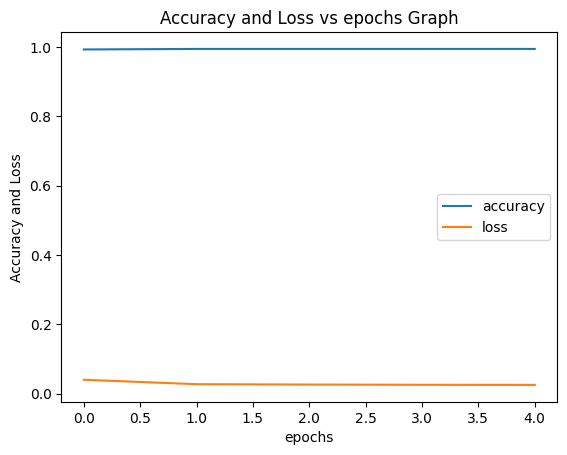

In [78]:
#plotting the graph between the training loss and accuracy vs number epochs.
eh = epochs_hist.history['accuracy']
eh2 = epochs_hist.history['loss']
plt.plot(eh)
plt.plot(eh2)
plt.title('Accuracy and Loss vs epochs Graph')
plt.xlabel('epochs')
plt.ylabel('Accuracy and Loss')
plt.legend({'accuracy','loss'})

In [66]:
#evaluating the model on the testing dataset.
evaluation = classifier_model.evaluate(X_test, y_test)
print('test_accuracy:{}'.format(evaluation[1]))

15989/15989 [==============================] - 50s 3ms/step - loss: 0.0188 - accuracy: 0.9958
test_accuracy:0.9958074688911438


In [67]:
#prediction of the model.
y_predict = classifier_model.predict(X_test)

15989/15989 [==============================] - 25s 2ms/step


In [68]:
#displaying the predicted values
print(y_predict)

[[0.00233236]
 [0.0013801 ]
 [0.00272358]
 ...
 [0.00152614]
 [0.00081304]
 [0.00047387]]


In [69]:
#prediction of the model.
y_predict = (y_predict > 0.5)

In [70]:
#displaying the predicted values
y_predict

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [71]:
#filtering those values greater than 0.5 in training dataset.
y_train_predict = classifier_model.predict(X_train)
y_train_predict = (y_train_predict > 0.5)

15868/15868 [==============================] - 24s 2ms/step


In [72]:
#displaying the predicted values of the training dataset
y_train_predict

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

<Axes: >

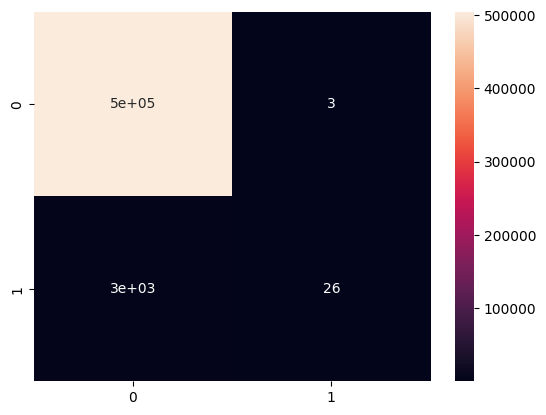

In [73]:
#plotting the confusion matrix of training dataset
cm = confusion_matrix(y_train, y_train_predict)
sns.heatmap(cm, annot = True)

<Axes: >

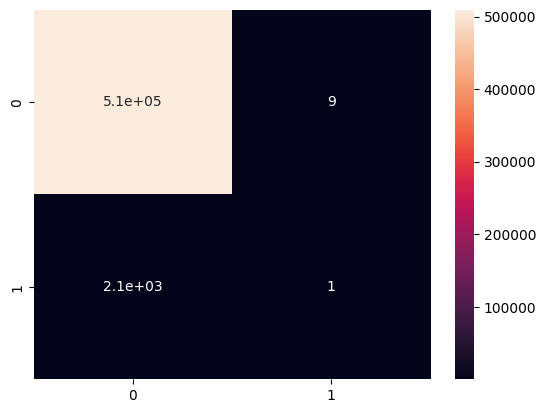

In [77]:
#plotting the confusion matrix of testing dataset
cm2 = confusion_matrix(y_test, y_predict)
sns.heatmap(cm2, annot = True)

In [75]:
#printing the classification report of training and testing dataset
print("Training Report:\n",classification_report(y_train,y_train_predict))
print("Testing Report:\n",classification_report(y_test, y_predict))

Training Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    504707
         1.0       0.90      0.01      0.02      3058

    accuracy                           0.99    507765
   macro avg       0.95      0.50      0.51    507765
weighted avg       0.99      0.99      0.99    507765

Testing Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    509486
         1.0       0.10      0.00      0.00      2137

    accuracy                           1.00    511623
   macro avg       0.55      0.50      0.50    511623
weighted avg       0.99      1.00      0.99    511623

